## Preparing our data

### Step 1.1: Read in our data

Is it a CSV?

In [3]:
import pandas as pd

In [26]:
df = pd.read_csv("wine-reviews.csv")
df=df[pd.notnull(df.category)]
df.head()

,alcohol,appellation,bottle size,category,date published,designation,importer,price,taster,url,user avg rating,variety,wine_desc,wine_name,wine_points,winery
0,14%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Cannubi,Oliver McCrum Wines,"$60, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/brezza-201...,Not rated yet [Add Your Review],Nebbiolo,One of the best expressions from the classic C...,Brezza 2013 Cannubi (Barolo),98.0,Brezza
1,14%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Brunate,Vinifera Imports,"N/A, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/giuseppe-r...,Not rated yet [Add Your Review],Nebbiolo,"Classic Nebbiolo aromas of new leather, mentho...",Giuseppe Rinaldi 2013 Brunate (Barolo),98.0,Giuseppe Rinaldi
2,14.5%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Vigna Rionda Riserva,Vineyard Brands,"$151, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/massolino-...,Not rated yet [Add Your Review],Nebbiolo,From one of the most celebrated vineyards in t...,Massolino 2011 Vigna Rionda Riserva (Barolo),98.0,Massolino
3,14%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Monvigliero,Bacchanal Wine Imports,"$70, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/comm-g-b-b...,Not rated yet [Add Your Review],Nebbiolo,Always the firm's showstopper and one of the b...,Comm. G. B. Burlotto 2013 Monvigliero (Barolo),98.0,Comm. G. B. Burlotto
4,14.5%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Badarina,Massanois Imports,"$75, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/grimaldi-b...,Not rated yet [Add Your Review],Nebbiolo,"A balsamic note of menthol, dark culinary spic...",Grimaldi Bruna 2013 Badarina (Barolo),97.0,Grimaldi Bruna


In [27]:
df.category.value_counts()

Red            2115
White          1393
Rose            401
Sparkling        62
Dessert          38
Port/Sherry      10
Name: category, dtype: int64

Is it a lot of separate files?

In [ ]:
# import glob
# filenames = glob.glob("*.txt")
# contents = [open(filename).read() for filename in filenames]
# df = pd.DataFrame({
#     'filename': filenames,
#     'content': contents
# })
# df.head()

In [ ]:
# Or is just just some stuff you're typing in?

### Step 1.2: Creating a label column

It needs to be a number, right? Before we just did "does it contain Italian" and make `True` be `1` and `False` be `0`, but most of the time we have **more than that.**

Let's talk about `LabelEncoder`. It can `fit`, it can `transform`, and it can `fit_transform`.

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
le.fit(["yellow", "orange", "turtle"])
# teach some words

LabelEncoder()

In [31]:
# convert words into numbers
# can only tell it things that it already knows
le.transform(('orange', 'turtle', 'turtle', 'yellow'))

array([0, 1, 1, 2])

In [32]:
le.fit_transform(['parakeet', 'b', 'c', 'c', 'c'])

array([2, 0, 1, 1, 1])

In [33]:
df.category.head()

0    Red
1    Red
2    Red
3    Red
4    Red
Name: category, dtype: object

In [34]:
# Create a new column called 'label'
# that is a numeric representation of the job

df['label'] = le.fit_transform(df.category)
df.head()

,alcohol,appellation,bottle size,category,date published,designation,importer,price,taster,url,user avg rating,variety,wine_desc,wine_name,wine_points,winery,label
0,14%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Cannubi,Oliver McCrum Wines,"$60, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/brezza-201...,Not rated yet [Add Your Review],Nebbiolo,One of the best expressions from the classic C...,Brezza 2013 Cannubi (Barolo),98.0,Brezza,2
1,14%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Brunate,Vinifera Imports,"N/A, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/giuseppe-r...,Not rated yet [Add Your Review],Nebbiolo,"Classic Nebbiolo aromas of new leather, mentho...",Giuseppe Rinaldi 2013 Brunate (Barolo),98.0,Giuseppe Rinaldi,2
2,14.5%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Vigna Rionda Riserva,Vineyard Brands,"$151, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/massolino-...,Not rated yet [Add Your Review],Nebbiolo,From one of the most celebrated vineyards in t...,Massolino 2011 Vigna Rionda Riserva (Barolo),98.0,Massolino,2
3,14%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Monvigliero,Bacchanal Wine Imports,"$70, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/comm-g-b-b...,Not rated yet [Add Your Review],Nebbiolo,Always the firm's showstopper and one of the b...,Comm. G. B. Burlotto 2013 Monvigliero (Barolo),98.0,Comm. G. B. Burlotto,2
4,14.5%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Badarina,Massanois Imports,"$75, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/grimaldi-b...,Not rated yet [Add Your Review],Nebbiolo,"A balsamic note of menthol, dark culinary spic...",Grimaldi Bruna 2013 Badarina (Barolo),97.0,Grimaldi Bruna,2
5,14%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Parafada,Vineyard Brands,"$97, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/massolino-...,Not rated yet [Add Your Review],Nebbiolo,"Aromas of new leather, ripe dark berry, vineya...",Massolino 2013 Parafada (Barolo),97.0,Massolino,2
6,14.5%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Le Vigne,Vintus LLC,"$155, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/sandrone-2...,Not rated yet [Add Your Review],Nebbiolo,"Alluring scents of blue flower, rose petal, wo...",Sandrone 2013 Le Vigne (Barolo),97.0,Sandrone,2
7,14%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Bussia,"Skurnik Wines, Inc","$55, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/giacomo-fe...,Not rated yet [Add Your Review],Nebbiolo,"Rose, iris, wild berry and baking spice aromas...",Giacomo Fenocchio 2013 Bussia (Barolo),97.0,Giacomo Fenocchio,2
8,14%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Tre Tine,Vinifera Imports,"N/A, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/giuseppe-r...,Not rated yet [Add Your Review],Nebbiolo,"Delicately fragrant and incredibly refined, th...",Giuseppe Rinaldi 2013 Tre Tine (Barolo),97.0,Giuseppe Rinaldi,2
9,14.5%,"Barolo, Piedmont, Italy",750 ml,Red,9/1/2017,Ravera,Wilson Daniels Ltd,"$82, Buy Now",Kerin O’Keefe,http://www.winemag.com/buying-guide/elvio-cogn...,Not rated yet [Add Your Review],Nebbiolo,"Wild berry, iris, rose and a potpourri of culi...",Elvio Cogno 2013 Ravera (Barolo),97.0,Elvio Cogno,2


## Creating features

These need to be numbers, too, right?

### Step 2.0: If you aren't analyzing text, you'll just move some columns into `features_df` like

```
features_df = df[['age','weight']]
```

### Step 2.1: If analyzing text, create your vectorizer

Which kind of vectorizer are you using? A **CountVectorizer** to only count values, or a **TfIdfVectorizer** to count percentages? Once you've figured it out, answer the following questions.

1. **vocabulary**: are you looking for a specific set of words? It's just a normal list. If you dont give a vocabulary, the computer will figure out the list of words for you (it's pretty good at that!) - so you don't usually use a vocabulary unless you have a REALLY GOOD REASON.
1. **ngram_range**: are you only vectorizing single words, or are you also looking at multi-word phrases? By default it only looks for one word `(1,1)`, but you can look for 1-2 word phrases `(1,2)`, only 4-word phrases `(4,4)`, etc.
1. **binary**: Do you want to just test to see if a word is included or not, and don't care about counting? `True` or `False`.
1. **tokenizer**: are you going to do any stemming or lemmatization, or are you okay with the existing words?
1. **stop_words**: do you use stopwords? Stopwords are useless for judging content, but good for judging style. `english` will give default words, or use a list to use multiple.
1. **max_df**: do you want to not include words that show up in a lot of documents? `0.0`-`1.0` to have a percentage as a ceiling, or an integer to have a maximum number of documents. For example, "5" means "Ignore anything that shows up in more than 5 documents" 
1. **min_df**: do you want to not include words that show up in a only a few documents? `0.0`-`1.0` to have a percentage as a floor, or an integer to have a maximum number of documents. For example, "0.05" means "Ignore anything that shows up in fewer than 5% of documents" 
1. **use_idf**: do you want to use inverse document frequency, which makes less frequent words more important? (`TfidfVectorizer` only)

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

When you build your vectorizer, this is where all of the options above go, like **stop_words** and **ngram_range**.

In [76]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

In [85]:
vec = CountVectorizer(stop_words='english', binary=True, ngram_range=(1,2))
#vec = TfIdfVectorizer()
matrix = vec.fit_transform(df.wine_desc)
features_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
features_df

,000,000 bottles,030,030 feet,10,10 acre,10 aligoté,10 cabernet,10 carignan,10 cinsault,...,émilion,émilion base,émilion structured,émilion wine,über,über simple,überaromatic,überaromatic notes,žilavka,žilavka medium
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 2.2: Creating custom columns in addition to text

First, you'll create a function for every feature you'd like to add

In [29]:
# # This is a very rough approximation, but it's going to be faster than using TextBlob
# def average_sentence_length(text):
#     # Split into sentences using periods, and words using spaces
#     sentences = text.split(".")
#     words = text.split(" ")
#     return len(words) / len(sentences)

# # Let's test it while we're here
# sentence = "This is an average sentence. And another."
# length = average_sentence_length(sentence)
# print(length)

2.3333333333333335


Then use `.apply` to run it for every row, and add it to `features_df`. Be sure to give it a **weird name** that won't overlap with your word counts! And when you do `.apply`, use `df.colname.apply` instead of `df.apply`, since your function takes the TEXT and not the ROW.

In [30]:
# features_df['CUSTOM_sentence_length'] = df.text.apply(average_sentence_length)
# features_df.head()

,corn,doing,dubloons,fields,fight,gold,high,life,market,ocean,...,plants,reap,sail,seas,sell,sharks,ships,stuff,work,CUSTOM_sentence_length
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,7.0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,9.0
2,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,6.0
3,0,0,1,0,1,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,11.0
4,0,0,0,1,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,16.0


In [32]:
# del features_df['CUSTOM_sentence_length']

# # delete

In [33]:
# features_df

,corn,doing,dubloons,fields,fight,gold,high,life,market,ocean,planting,plants,reap,sail,seas,sell,sharks,ships,stuff,work
0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
2,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Classifying

### Step 3.1: Selecting and creating a classifier

You have a few options! Generally you can try them all and pick the one that ends up working best.

* **Multinominal Naive Bayes - (multiple numbers)**: You count the words. You care about whether a word appears once or twice or three times or ten times. *This is better for long passages*
* **Bernoulli Naive Bayes - True/False Bayes:** You only care if the word shows up (`1`) or it doesn't show up (`0`) - *this is better for short passages*
* **Decision Trees** are another kind of classifier. They can make fun charts. They don't care about whether things are correlated, which can be a problem for Naive Bayes.

In [94]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# What kind of classifier?
# clf = BernoulliNB()
# clf = MultinomialNB()
clf = DecisionTreeClassifier(max_depth=3)

### Step 3.2: Train/test split

Some data you'll train your classifier with, some you'll use for testing. That's how you know how good your model is!

**You can only train and test on rows you know the answer to already.** Do you have 100,000 emails but only know what 2,000 of them are about? You'll need to **filter that first**.

In [95]:
# SANITY CHECK: What are your features?
# They are probably in a separte df just for features, and they should be numbers.
features_df.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [96]:
# SANITY CHECK: What are your labels?
# They're probably in your original dataframe, and they should be numbers.
df.category

0               Red
1               Red
2               Red
3               Red
4               Red
5               Red
6               Red
7               Red
8               Red
9               Red
10              Red
11              Red
12              Red
13              Red
14              Red
15              Red
16              Red
17              Red
18      Port/Sherry
19              Red
20              Red
21          Dessert
22              Red
23          Dessert
24          Dessert
25          Dessert
26              Red
27          Dessert
28              Red
29              Red
           ...     
3990          White
3991            Red
3992          White
3993          White
3994            Red
3995            Red
3996            Red
3997            Red
3998          White
3999            Red
4000            Red
4001           Rose
4002          White
4003          White
4004            Red
4005          White
4006          White
4007           Rose
4008            Red


Okay, now you're allowed to do your split. Once you know how this works you can delete all of the comments.

In [97]:
# train_test_split will split our data into two parts
from sklearn.model_selection import train_test_split

# Splitting into...
# X = are all our features
# y = are all our labels
# X_train are our features to train on (80%)
# y_train are our labels to train on (80%)
# X_test are our features to test on (20%)
# y_train are our labels to test on (20%)

X_train, X_test, y_train, y_test = train_test_split(
    features_df.values,  # Is this what your features are?
    df.label, # Is this what your labels are?
    test_size=0.2) 

# the first parameter is our FEATURES. It usually needs .values if it's a big dataframe
# the second parameter is the LABEL as a number
# 80% training, 20% testing

### Step 3.3: Fit and score your model

Teach it what you know, and see how well did you did!

First we'll **teach it with training data.**

In [98]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Then we'll **score with testing data**.

In [99]:
clf.score(X_test, y_test)

0.72263681592039797

You can also check to see how well it does against data it's already seen, if you want!

In [100]:
clf.score(X_train, y_train)

0.72161741835147741

## Understanding your classifier

### Method 1: Top words for each category

This only works for Naive Bayes classifiers.

In [101]:
# From http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html
import numpy as np

le.classes_

class_labels = le.classes_
feature_names = vec.get_feature_names()
for i, class_label in enumerate(class_labels):
    try:
        top10 = np.argsort(clf.coef_[i])[-10:]
        features_names = vec.get_feature_names()
        print("%s: %s" % (class_label, " ".join(features_names[j] for j in top10)))
    except:
        pass

### Method 2: Draw the decision tree

Decision tree only, of course. You probably ned to go back to when you made the tree and add `max_depth=3` or something to make it not get so big it won't display.

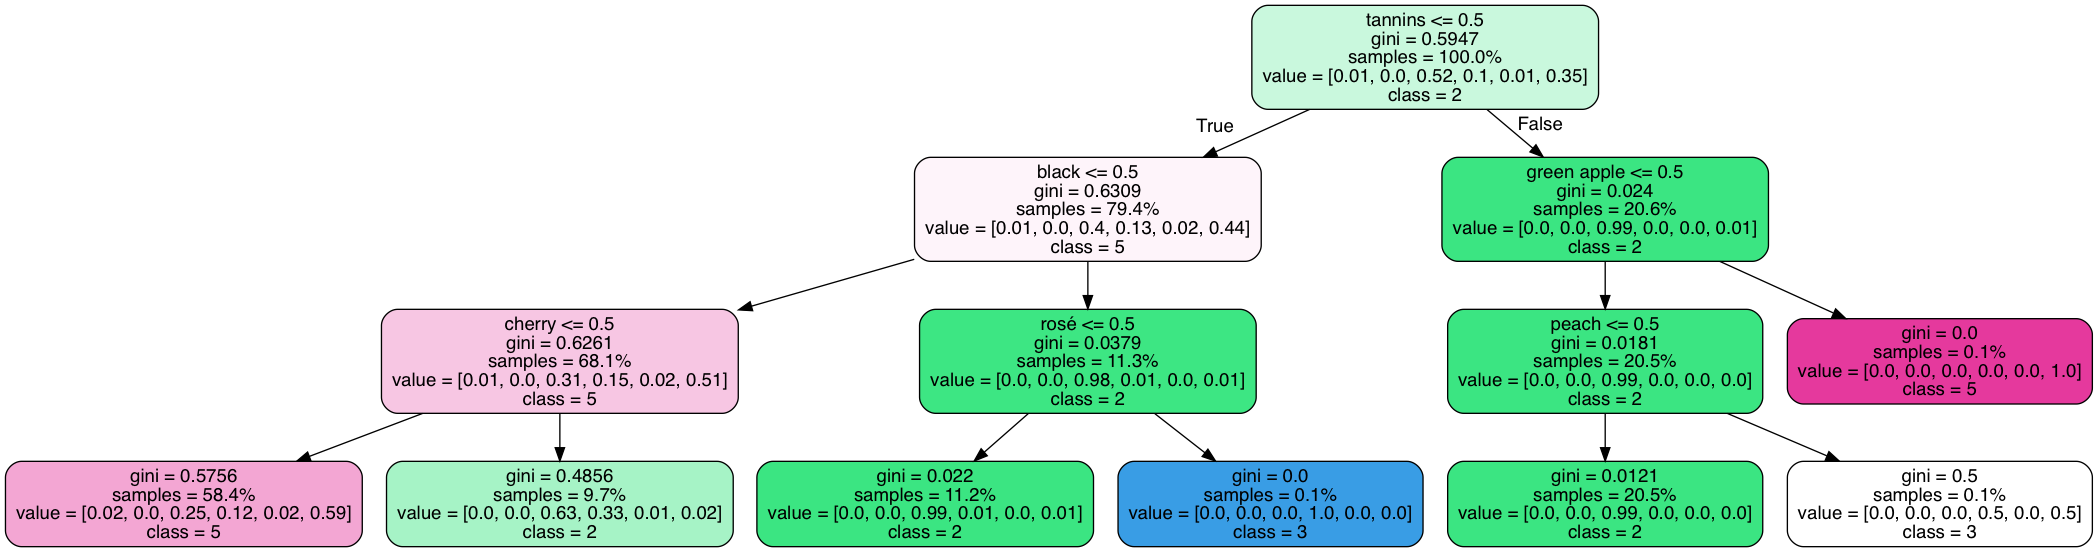

In [102]:
%matplotlib inline

import pydotplus
from sklearn import tree
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None, 
    feature_names=vec.get_feature_names(),  
    class_names=clf.classes_.astype(str),  
    filled=True, rounded=True,  proportion=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [104]:
le.classes_

array(['Dessert', 'Port/Sherry', 'Red', 'Rose', 'Sparkling', 'White'], dtype=object)